In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import statsmodels as st
import os
import matplotlib as plt
import statsmodels.formula.api as smf
from pandas import DataFrame
from datetime import datetime
from time import time
import pylab as pl
%pylab inline

#using PUI2016_Python3 kernal

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#In the Citibike data is coded as(Zero=unknown; 1=male; 2=female)

# ALTERNATIVE HYPOTHESIS:
## Females are less likely than males to choose biking at night

# NULL HYPOTHESIS:
## The proportion of males biking at night is _the same_ or _higher_  than the proportion of females biking at night

# _$H_0$_ : $\frac{M_{\mathrm{night}}}{M_{\mathrm{total}}} <= \frac{F_{\mathrm{night}}}{F_{\mathrm{total}}}$
# _$H_1$_ : $\frac{M_{\mathrm{night}}}{M_{\mathrm{total}}} > \frac{F_{\mathrm{night}}}{F_{\mathrm{total}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

##night is defined as the hours of 7pm-5am

In [2]:
#download the dataset into PUIDATA and upzip the files
os.system("curl -O https://s3.amazonaws.com/tripdata/201701-citibike-tripdata.csv.zip")
os.system("unzip 201701-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201702-citibike-tripdata.csv.zip")
os.system("unzip 201702-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201703-citibike-tripdata.csv.zip")
os.system("unzip 201703-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201704-citibike-tripdata.csv.zip")
os.system("unzip 201704-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))


256

In [3]:
os.system("curl -O https://s3.amazonaws.com/tripdata/201705-citibike-tripdata.csv.zip")
os.system("unzip 201705-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201706-citibike-tripdata.csv.zip")
os.system("unzip 201706-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip")
os.system("unzip 201707-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

os.system("curl -O https://s3.amazonaws.com/tripdata/201708-citibike-tripdata.csv.zip")
os.system("unzip 201708-citibike-tripdata.csv.zip -d " + os.getenv("PUIDATA"))

256

In [4]:
#read the data
jan = pd.read_csv( os.getenv("PUIDATA") + "/201701-citibike-tripdata.csv")
feb = pd.read_csv( os.getenv("PUIDATA") + "/201702-citibike-tripdata.csv")
march = pd.read_csv( os.getenv("PUIDATA") + "/201703-citibike-tripdata.csv")
april = pd.read_csv( os.getenv("PUIDATA") + "/201704-citibike-tripdata.csv")
may = pd.read_csv( os.getenv("PUIDATA") + "/201705-citibike-tripdata.csv")
june = pd.read_csv( os.getenv("PUIDATA") + "/201706-citibike-tripdata.csv")
july = pd.read_csv( os.getenv("PUIDATA") + "/201707-citibike-tripdata.csv")
aug = pd.read_csv( os.getenv("PUIDATA") + "/201708-citibike-tripdata.csv")
#sep = pd.read_csv( os.getenv("PUIDATA") + "/201709-citibike-tripdata.csv")

In [5]:
aug.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2
3,323,2017-08-01 00:00:27,2017-08-01 00:05:51,389,Broadway & Berry St,40.710446,-73.965251,3073,Division Ave & Hooper St,40.706913,-73.954417,18705,Subscriber,1990.0,1
4,109,2017-08-01 00:00:41,2017-08-01 00:02:31,3145,E 84 St & Park Ave,40.778627,-73.957721,3147,E 85 St & 3 Ave,40.778012,-73.954071,27975,Subscriber,1983.0,1


In [6]:
aug.shape

(1816498, 15)

In [7]:
months = [jan, feb, march, april, may, june, july, aug]

In [8]:
#rename the irrelevant columns into alphabet letters.
for i in months:
    i.columns = ['a', 'starttime','stoptime','b','c','d', 'e','f', 'g', 'h', 'i', 'j', 'k', 'l','gender']

In [9]:
##Marium wrote this part. create a list contains the name of all dataframes. drop the irrelevant columns.
dropp= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

for i in months:
    i.drop(dropp, inplace = True, axis = 1)


In [10]:
monthname = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug']
for i,e in enumerate(months):
    e['month'] = monthname[i]

In [11]:
allmonths = pd.concat(months)

In [12]:
allmonths.head()

,starttime,stoptime,gender,month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan
1,2017-01-01 00:00:45,2017-01-01 00:22:08,2,jan
2,2017-01-01 00:00:57,2017-01-01 00:11:46,0,jan
3,2017-01-01 00:01:10,2017-01-01 00:11:42,0,jan
4,2017-01-01 00:01:25,2017-01-01 00:11:47,0,jan


In [13]:
allmonths.shape

(10368351, 4)

In [14]:
#the dataset is too big, select % of the orginal one to do further analysis
df2 = allmonths[::20]

In [15]:
df2.head()

,starttime,stoptime,gender,month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan
20,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan
40,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan
60,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan
80,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan


In [16]:
df2.shape

(518418, 4)

In [17]:
df2['time']= df2['starttime'].apply(lambda x : pd.to_datetime(x).time())

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
import datetime as dt

nightstart = dt.datetime.strptime('19:00:00', '%H:%M:%S').time()
#7pm
nightend = dt.datetime.strptime('05:00:00', '%H:%M:%S').time()
#5am

In [19]:
def time_checker(t):
    if t > nightstart:
        return 'Night Rider'
    if t < nightend:
        return 'Night Rider'
    else:
        return 'Day Rider'

In [20]:
df2['typeofrider'] = df2['time'].apply(lambda x: time_checker(x))
df2.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,starttime,stoptime,gender,month,time,typeofrider
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider
20,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider
40,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider
60,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider
80,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider


In [21]:
##save the dataframe into a csv file
df2.to_csv('df2_hw7.csv' ,  index = False)

In [22]:
cmd = "mv df2_hw7.csv " + os.getenv("PUIDATA")
os.system(cmd)
df3 = pd.read_csv(os.getenv("PUIDATA") + '/df2_hw7.csv')
df3.head()

,starttime,stoptime,gender,month,time,typeofrider
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider
1,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider
2,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider
3,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider
4,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider


In [23]:
#create a dictionary which converts monthname into integer. 
#so that the columns of months we will draw in the next section can be displayed in the right order.
month = {'jan':1,'feb':2,'march':3,'april':4,'may':5,'june':6,'july':7,'aug':8}

In [24]:
#add a column that represent month in numerical numbers since we will use it in the later plotting.
df3['n_month'] = df3['month'].apply(lambda x:month[x])

In [25]:
df3.head()

,starttime,stoptime,gender,month,time,typeofrider,n_month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider,1
1,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider,1
2,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider,1
3,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider,1
4,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider,1


In [26]:
counts_w = df3.typeofrider[df3.gender == 2].groupby([df3.typeofrider]).count()
error_w = np.sqrt(counts_w)
counts_m = df3.typeofrider[df3.gender == 1].groupby([df3.typeofrider]).count()
error_m = np.sqrt(counts_m)

In [27]:
counts_w

typeofrider
Day Rider      94547
Night Rider    22527
Name: typeofrider, dtype: int64

In [28]:
norm_w = counts_w.sum()
norm_m = counts_m.sum()

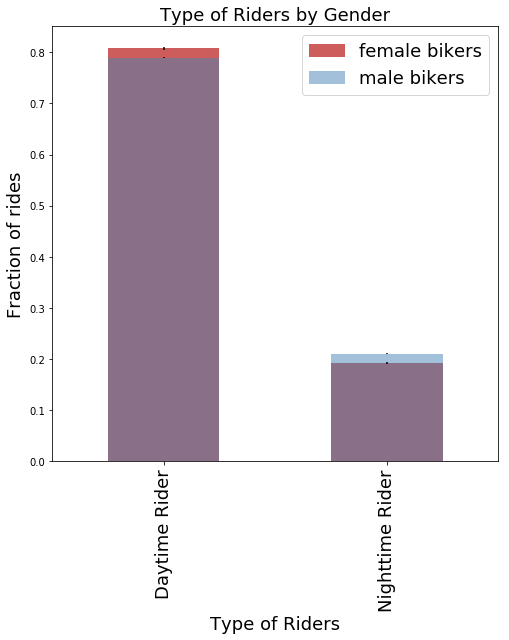

In [46]:
fig = pl.figure(figsize(8,8))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='female bikers')

norm_m = counts_m.sum()
error_m = np.sqrt(counts_m)
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='male bikers')

ax.xaxis.set_ticklabels(['Daytime Rider', 'Nighttime Rider'], fontsize=18)
ax.set_ylabel ("Fraction of rides", fontsize = 18)
ax.set_xlabel ("Type of Riders", fontsize =18)
ax.set_title ('Type of Riders by Gender', fontsize = 18)

pl.legend(['female bikers','male bikers'],fontsize=18)

fig.savefig('fig1.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## According to the thin sliver of blue coming past the red on the histogram, it seems that males are more likely to ride bike during nighttime than females do.

Males: day:0.790, night:0.210, day error:0.002, night error:0.001
Females: day:0.808, night:0.192, day error:0.003, night error:0.001


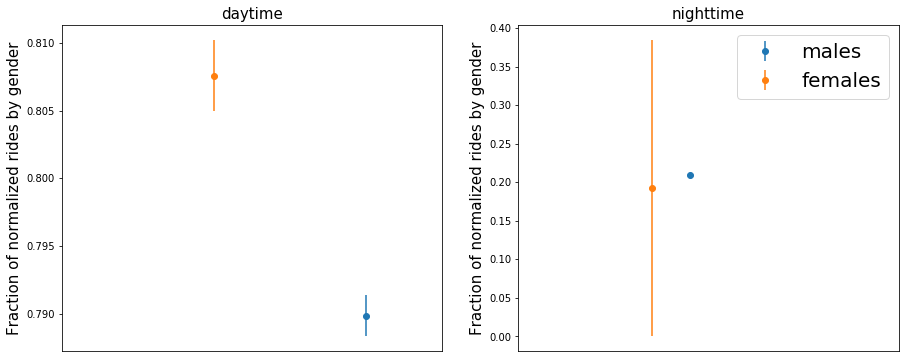

In [58]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

day_w = sum(counts_w[0]) * 1.0 / norm_w  #fraction of females riding on week days
night_w = sum(counts_w[1]) * 1.0 / norm_w  #fraction of females riding on weekends
eday_w = np.sqrt(sum(error_w[0]**2)) / norm_w  #error on fraction number of females riding on week days
enight_w = np.sqrt(sum(error_w[1]**2)) / norm_w #error on fraction number of females riding on weekends

#same nomenclature as above
day_m = sum(counts_m[0]) * 1.0 / norm_m
night_m = sum(counts_m[1]) * 1.0 / norm_m
eday_m = np.sqrt(sum(error_m[0]**2)) / norm_m
enight_m = np.sqrt(sum(error_m[1]**2)) / norm_m

print("Males: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_m, night_m, eday_m, enight_m))
print("Females: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_w, night_w, eday_w, enight_w))

ax1.errorbar([0.4], [day_m], yerr=[eday_m], fmt='o', label='males')
ax1.errorbar([0.2], [day_w], yerr=[eday_w], fmt='o', label='females')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_m], yerr=[enight_m], fmt='o', label='males')
ax2.errorbar([0.2], [night_w], yerr=[night_w], fmt='o', label='females')
ax1.set_xlim(0, 0.5)
ax1.set_title("daytime" , fontsize = 15)
ax2.set_title("nighttime", fontsize = 15) 
ax2.set_ylabel("Fraction of normalized rides by gender", fontsize = 15)
ax1.set_ylabel("Fraction of normalized rides by gender", fontsize = 15)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

fig.savefig('fig2.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Figure 1: Fraction of Citibike bikers per gender from Jan to Aug in 2017 for week daytime (left) and nightime(right)
#### it shows that the fraction of female nighttime riders has a very huge variance so that it is necessry to normalize the value by using Z score.

## Ho: Is the percentage of males that ride on nighttime lower or equal to that of female?
## Ha: Is the percentage of males that ride on nighttime higher than that of female?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{M_{\mathrm{night}}}{M_{\mathrm{total}}}$
### and 
# $p_1 = \frac{W_{\mathrm{night}}}{W_{\mathrm{total}}}$


In [31]:
P0mP1 = night_m - night_w
print ("difference between males and females at night: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between males and females at night:  0.0177308576355
We must check the significance before we reject the Null Hypothesis


In [32]:
df3.head()

,starttime,stoptime,gender,month,time,typeofrider,n_month
0,2017-01-01 00:00:21,2017-01-01 00:11:41,2,jan,00:00:21,Night Rider,1
1,2017-01-01 00:10:11,2017-01-01 00:16:02,2,jan,00:10:11,Night Rider,1
2,2017-01-01 00:14:55,2017-01-01 00:24:48,1,jan,00:14:55,Night Rider,1
3,2017-01-01 00:18:06,2017-01-01 00:27:31,2,jan,00:18:06,Night Rider,1
4,2017-01-01 00:22:36,2017-01-01 00:53:14,1,jan,00:22:36,Night Rider,1


### Is this difference statistically significant?

In [33]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(night_m, night_w, norm_m, norm_w), norm_m, norm_w)
# print (sp_stdev_mw)
z = zscore(night_m, night_w, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 12.97


In [34]:
import scipy.stats as sts
pvalue = 1 - sts.norm.cdf(z)
print ('p-value is %f.'%pvalue)

p-value is 0.000000.


## The p value is is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)
## We reject the Null Hypothesis that females are more, or equally, likely to ride during nighttime than man do $p< 0.05$

In [35]:
#calulate the counts of nighttime rider by month and gender
counts_w_month = df3.typeofrider[df3.typeofrider == 'Night Rider'][df3.gender == 2].groupby([df3.typeofrider,df3.n_month]).count()
counts_m_month = df3.typeofrider[df3.typeofrider == 'Night Rider'][df3.gender == 1].groupby([df3.typeofrider,df3.n_month]).count()

In [36]:
counts_w_month #female nighttime riders
counts_m_month #male nighttime riders

typeofrider  n_month
Night Rider  1           4954
             2           5229
             3           5136
             4           8562
             5          10495
             6          12424
             7          12774
             8          12829
Name: typeofrider, dtype: int64

In [37]:
#calulate the counts of total riders by month and gender
norm_w_month = df3.typeofrider[df3.gender == 2].groupby([df3.n_month]).count() #total female riders
norm_m_month = df3.typeofrider[df3.gender == 1].groupby([df3.n_month]).count() #total male riders

In [38]:
norm_w_month

n_month
1     7643
2     8677
3     7734
4    14361
5    17210
6    19977
7    20152
8    21320
Name: typeofrider, dtype: int64

In [39]:
w_month = counts_w_month/norm_w_month #fraction of female nighttime riders
m_month = counts_m_month/norm_m_month #fraction of male nighttime riders

In [40]:
w_month

typeofrider  n_month
Night Rider  1          0.165380
             2          0.164573
             3          0.166408
             4          0.173177
             5          0.189599
             6          0.203534
             7          0.218440
             8          0.203096
Name: typeofrider, dtype: float64

In [41]:
m_month

typeofrider  n_month
Night Rider  1          0.182730
             2          0.184029
             3          0.191221
             4          0.200896
             5          0.209934
             6          0.219641
             7          0.232179
             8          0.221358
Name: typeofrider, dtype: float64

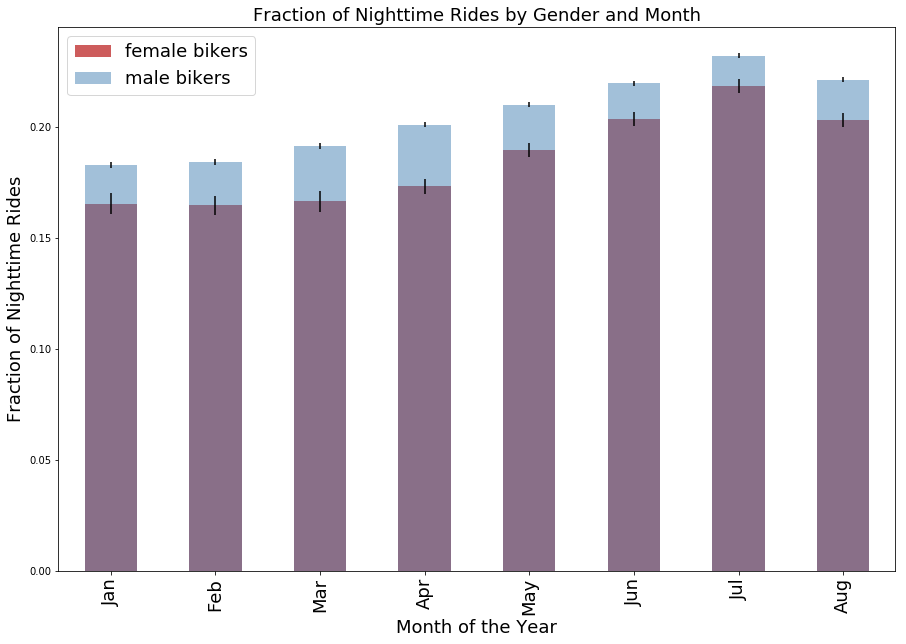

In [48]:
#draw a histogram show the fraction of nighttime riders by month
fig = pl.figure(figsize(15,10))

error_w_month = np.sqrt(counts_w_month)
ax1 = (w_month).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w_month) / norm_w_month, (error_w_month) / norm_w_month)], 
                           label='female bikers')
error_m_month = np.sqrt(counts_w_month)
ax2 = (m_month).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m_month) / norm_m_month, (error_m_month) / norm_m_month)], 
                                color='SteelBlue', label='male bikers')

ax1.xaxis.set_ticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug'], fontsize=18)
ax1.set_ylabel ("Fraction of Nighttime Rides", fontsize = 18)
ax1.set_xlabel ("Month of the Year", fontsize =18)
ax1.set_title ('Fraction of Nighttime Rides by Gender and Month', fontsize = 18)

pl.legend(['female bikers', 'male bikers'],fontsize=18)

fig.savefig('fig3.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

#### According to the chart, it seems that male are more likely to ride at nighttime compared to female during any of the months from Jan to August in 2017. We can run a series of  z tests test the corresponding significance.

In [53]:
#create a dictionary contains the name of the correponding month.
month2 = {0:'January',1:'Feburary',2:'March',3:'April',4:'May',5:'June',6:'July',7:'August'}

In [55]:
import scipy.stats as sts
for i in range(0,8):
    sp_stdev_mw = se(p(m_month[i], w_month[i], norm_m_month[i+1], norm_w_month[i+1]), norm_m_month[i+1], norm_w_month[i+1])
    # print (sp_stdev_mw)
    z = zscore(m_month[i], w_month[i], sp_stdev_mw)
    pvalue = 1 - sts.norm.cdf(z)
    m = month2[i]
    print ("The p-value for %s is %f"%(m,pvalue))

The p-value for January is 0.000237
The p-value for Feburary is 0.000018
The p-value for March is 0.000000
The p-value for April is 0.000000
The p-value for May is 0.000000
The p-value for June is 0.000001
The p-value for July is 0.000035
The p-value for August is 0.000000


At 95% confidence interval, we can reject Ho hypothesis that females ride more, or equal to, males during nighttime during any of the month. Since the p-value of these months are all less than the alpha (0.05). 